In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("./scores.csv")
data.drop(columns=["Unnamed: 0"], inplace=True)
data

,model,fitness,episode
0,./models\3cabc502v1_20241121-171431_0.pth,-137.265245,0
1,./models\3cabc502v1_20241121-171444_0.pth,-137.265245,0
2,./models\3cabc502v1_20241121-171444_100.pth,-128.408809,100
3,./models\3cabc502v1_20241121-171444_200.pth,-137.265245,200
4,./models\3cabc502v1_20241121-171444_300.pth,-137.265245,300
...,...,...,...
2205,./models\v1_20241130-095346_49e4846d_66200.pth,-42.252402,66200
2206,./models\v1_20241130-095346_49e4846d_66300.pth,-40.208672,66300
2207,./models\v1_20241130-095346_49e4846d_66400.pth,-52.366334,66400
2208,./models\v1_20241130-095346_49e4846d_66500.pth,-44.080427,66500


In [9]:
data['timestamp'] = data['model'].map(lambda x: x.split('_')[1])
data

,model,fitness,episode,timestamp
0,./models\3cabc502v1_20241121-171431_0.pth,-137.265245,0,20241121-171431
1,./models\3cabc502v1_20241121-171444_0.pth,-137.265245,0,20241121-171444
2,./models\3cabc502v1_20241121-171444_100.pth,-128.408809,100,20241121-171444
3,./models\3cabc502v1_20241121-171444_200.pth,-137.265245,200,20241121-171444
4,./models\3cabc502v1_20241121-171444_300.pth,-137.265245,300,20241121-171444
...,...,...,...,...
2205,./models\v1_20241130-095346_49e4846d_66200.pth,-42.252402,66200,20241130-095346
2206,./models\v1_20241130-095346_49e4846d_66300.pth,-40.208672,66300,20241130-095346
2207,./models\v1_20241130-095346_49e4846d_66400.pth,-52.366334,66400,20241130-095346
2208,./models\v1_20241130-095346_49e4846d_66500.pth,-44.080427,66500,20241130-095346


In [16]:
plots = data.groupby('timestamp').apply(lambda x: x)
plots

C:\Users\Maciej\AppData\Local\Temp\ipykernel_21992\1987741560.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  plots = data.groupby('timestamp').apply(lambda x: x)


model  \
timestamp                                                              
20241120-220235 153        ./models\94f62293v1_20241120-220235_0.pth   
20241120-220554 154        ./models\94f62293v1_20241120-220554_0.pth   
20241120-220607 155        ./models\94f62293v1_20241120-220607_0.pth   
                156      ./models\94f62293v1_20241120-220607_100.pth   
                157      ./models\94f62293v1_20241120-220607_200.pth   
...                                                              ...   
20241130-095346 2205  ./models\v1_20241130-095346_49e4846d_66200.pth   
                2206  ./models\v1_20241130-095346_49e4846d_66300.pth   
                2207  ./models\v1_20241130-095346_49e4846d_66400.pth   
                2208  ./models\v1_20241130-095346_49e4846d_66500.pth   
                2209  ./models\v1_20241130-095346_49e4846d_66600.pth   

                         fitness  episode        timestamp  
timestamp                                                   
20241120-220235 153  -137.265245        0  20241120-220235  
20241120-220554 154  -598.558841        0  20241120-220554  
20241120-220607 155  -162.962573        0  20241120-220607  
                156  -822.592820      100  20241120-220607  
                157  -802.232459      200  20241120-220607  
...                          ...      ...              ...  
20241130-095346 2205  -42.252402    66200  20241130-095346  
                2206  -40.208672    66300  20241130-095346  
                2207  -52.366334    66400  20241130-095346  
                2208  -44.080427    66500  20241130-095346  
                2209  -50.768123    66600  20241130-095346  

[2210 rows x 4 columns]

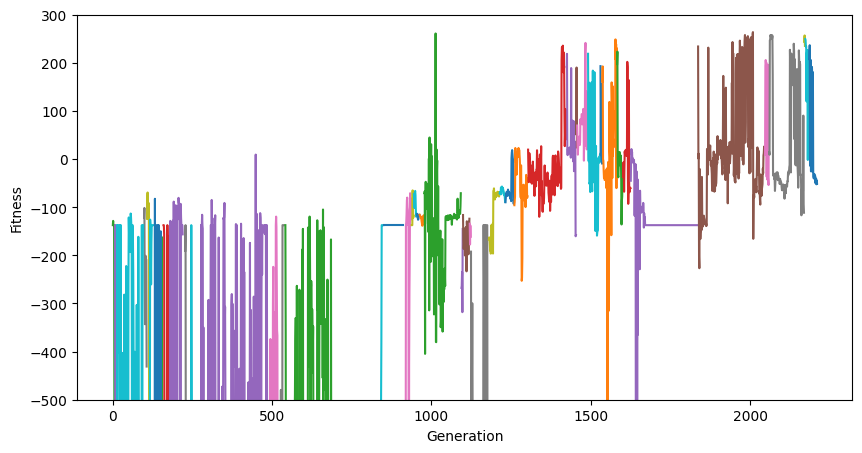

In [49]:
plt.figure(figsize=(10, 5))
for model in plots['timestamp'].unique():
    values = plots[plots['timestamp'] == model]
    x = values.index.get_level_values(1)
    y = values['fitness']
    
    plt.plot(x, y, label=model)

plt.ylabel('Fitness')
plt.xlabel('Generation')
plt.ylim(-500, 300)
plt.show()